### Learning Curve

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os
import matplotlib

# define some random data that emulates your indeded code:
NCURVES = 8
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Greens_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_g = cmx.ScalarMappable(norm=cNorm, cmap=blues)

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 20,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 0.1,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")


In [26]:
path = "Tests/GHZ_phase/classical/5_qubits_new/"
# load the AL data

ALdata = {}
ALdata["KL"] = pd.read_csv(path + "/KL.csv")
ALdata["rescaled fidelity"] = pd.read_csv(path + "/rescaled_fidelity.csv")


# load baseline data
baseline_data = {}
baseline_data["KL"] = pd.read_csv(path + "/baseline_KL.csv")
baseline_data["rescaled fidelity"] = pd.read_csv(path + "/baseline_rescaled_fidelity.csv")


print(ALdata.keys())
print(baseline_data.keys())




dict_keys(['KL', 'rescaled fidelity'])
dict_keys(['KL', 'rescaled fidelity'])


104
   XZZYZ 
0  YZZZY 
1  XXYZY 
2  ZZXXX 
3  XYXXZ 
4  ZXYYX 
5  YYZXY 
6  ZZZZZ 
7
[0.7900367004550829, 0.8369453671576447, 0.7797827905552642, 0.8871449681813502, 0.6902944087877324, 0.5421510913172002]


C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.


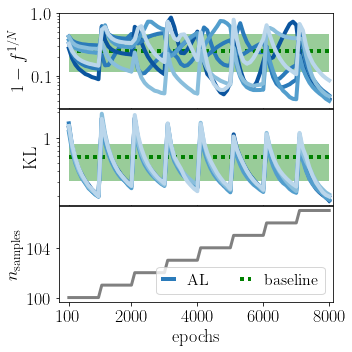

In [36]:

data = ALdata
d = "/Training_data/initialize/1samples/query_by_amplitude_and_phase/baseline/"
#fig, ax = plt.subplots(len(list(data.keys())), 2, figsize=(5,len(list(data.keys()))*3))
samples = pd.read_csv(path + d +"/samples.txt")
num_samples = str(len(samples)+1)
print(num_samples)
bases = pd.read_csv(path + d +"/bases.txt")
print(bases)
num_bases = str(len(bases))
print(num_bases)
#fig.suptitle(path + "("+num_samples+" samples, "+num_bases+" configurations)", fontsize= 20)
fig, ax= plt.subplots(3,1,figsize=(5,5), sharex=True)
quantity = "rescaled fidelity"
quantity2 = "KL"

#baseline values
bl_value1 = []
bl_value2=[]
for i in (list(data[quantity].columns)):
    bl_value1.append(baseline_data[quantity].iloc[-1, :][i])
    bl_value2.append(baseline_data[quantity2].iloc[-1, :][i])
print(bl_value1[1:])
for RBM in enumerate(list(data[quantity].columns)[1:]):
    x = (data[quantity][RBM[1]].index+1)*100
    if RBM[0] ==0:
        ax[0].plot(x, (1-data[quantity][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax[0].plot(x, ([1-np.mean(bl_value1[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))
        ax[1].plot(x, ([np.mean(bl_value2[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline",linestyle= (0,(1,1)))
        ax[0].fill_between(x,[1-max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],facecolor = "green", alpha=0.4)
        ax[1].fill_between(x,[max(bl_value2[1:]) for item in x], [min(bl_value2[1:]) for item in x],facecolor = "green", alpha=0.4)
        ax[2].plot(x,[100+int(int(item-1)/1000) for item in x], color="grey")
        ax[2].plot([], [], "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax[2].plot([], [], "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))

    else:
        ax[0].plot(x, (1-data[quantity][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
        #ax[0].fill_between(x,[1-max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],color = scalarMap_g.to_rgba(values[int(RBM[1])]), alpha=0.9)
        ax[1].plot(x, (data[quantity2][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
ax[0].set_ylim(0.03,1)
#ax[2].set_ylim(99,112)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].set_yticks([0.1,1])
ax[1].set_yticks([1])
ax[2].set_xlim(-200,8100)
ax[2].legend(loc="lower right", fontsize=16, ncol=2, handlelength=0.7)
ax[0].set_ylabel(r"$1-f^{1/N}$", fontsize=18)
ax[1].set_ylabel(r"KL", fontsize=18)
ax[2].set_ylabel(r"$n_{\mathrm{samples}}$", fontsize=18)
ax[2].set_xlabel("epochs", fontsize=18)
ax[2].set_yticks([100, int(num_samples)])
ax[2].set_xticks([100, 2000,4000, 6000, 8000])
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()
plt.subplots_adjust(hspace=0.01)
plt.savefig("LearningCurve.pdf", dpi=1000)
plt.show()


The active learning curve for an exemplary state, namely a GHZ state with phase structure consisting of $5$ qubits and generated with the IBM quantum simulator, is shown in Fig.~\ref{fig:ALLearningCurve}. The results for AL tomography are compared to QST without active learning (denoted \textit{baseline}) by using the pure RBM reconstruction of QuCumber, the same number of samples as for AL and equally many, but randomly chosen measurement configurations. Note that we consider the number of samples and configurations at the end of the AL scheme for the baseline reconstruction. Hence, the results for AL and baseline can differ already at the beginning of the training. The pool of samples which is used for the RBM training is the same for all RBMs (both for AL and baseline, respectively).\\

Fig.~\ref{fig:ALLearningCurve} shows the learning curve for the AL scheme as presented in Fig.~\ref{fig:AL}. After the selection of the reference configuration ($zzzzz$, not shown in Fig.~\ref{fig:ALLearningCurve}) the training starts with $100$ samples drawn from the reference basis, which are fed into the QuCumber state reconstruction as implemented by Beach et al. \cite{Beach2019} (see step 3.). In the subsequent learning sequence up to epoch $1000$ the re-scaled fidelity $f^{1/N}$ increases ($1-f^{1/N}$ decreases) and the Kullback-Leibler divergence $KL$ decreases. However, the samples measured in step 1.) of the active learning routine do not contain enough information to decrease $1-f^{1/N}$ below a threshold value of $10\, \%$ (see first section in Fig.~\ref{fig:ALLearningCurve}). The lack of information is mostly due to the fact that no information on the phase structure of the state under consideration is contained in the measurements from the $zzzzz$ configuration. 

After that, more and more samples are added to the pool of measurements which are requested by the learner and the RBM learning process is re-started (with the same initialisation of the RBMs as before). For the state reconstruction presented in Fig. ~\ref{fig:AL}, the learner requests a measurement from the $xzzxx$ configuration in the first $6$ queries (see epochs $1000$ to $6000$), and from $zyyyz$ in the last learning cycle starting in epoch $7000$. Step by step, the learning curve drops and increases again with every query. This process is stopped when a specified re-scaled fidelity (here $f^{1/N}_{\mathrm{stop}}=90\, \%$) is reached or the number of posed queries exceeds a maximal value $N_{\mathrm{query}}^{\mathrm{max}}$ (in this paper we use $N_{\mathrm{query}}^{\mathrm{max}}=30$). The final fidelity in this example is $f^{1/N}=95.0 \pm 1.5
\,\%$ (average over the four RBMs used for step 3.)) using only $107$ samples and three configurations. Furthermore, in Fig.~\ref{fig:AL} it can be observed that there are regimes in the learning procedure where the difference between reconstructed and target state stagnates or even grows. This is not unintentional within our learning scheme: If a new sample is requested that contains completely different information (i.e. when adding the first sample from the $xzzxx$ configuration to a pool of $100$ samples from the $zz\dots z$ configuration in epoch $1000$) the learner may get confused in the first place. However, when requesting more and more samples afterwards, the same piece of information can become a valuable contribution to a good reconstruction.\\

A learning procedure without AL with the same number of measurements and equally many, but randomly chosen configurations ends with $f^{1/N}_{\mathrm{baseline}}=75\pm 11\,\%$ (average over four RBMs, all of them trained with the same samples), indicated by the dotted line in Fig. ~\ref{fig:ALLearningCurve}. Hence, the quality of the reconstruction was improved strongly by the use of active learning. Furthermore, the span of outcomes for different RBMs is significantly decreased compared to a learning procedure without active learning (visualized by the green band in Fig.~\ref{fig:ALLearningCurve}), which makes the results much more reliable than without AL. 



In [39]:
np.mean(bl_value1[1:])

0.7543925544090458